###**Machine Learning Project on an energy efficiency prediction problem**

In [207]:
#Here I am installing the sklearn library, to make sure I have the latest version
!pip install -U scikit-learn

In [208]:
#Here I am imported the python libraries that I will be using for this machine learning project.
#The Python libraries that I have imported are: pandas, matplotlib, sklearn and numpy.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import seaborn as sns

# Load the dataset into a pandas DataFrame
# data = pd.read_csv("/datcw_na (1).csv")

data = pd.read_csv("/content/datcw_na (1).csv")


In [209]:
#Renaming the columns to make it easier to understand the data
# data = data.rename(columns={
#     "X0":"Catergory of the building",
#     "X1":"Relative Compactness",
#     "X2":"Surface Area",
#     "X3":"Wall Area",
#     "X4":"Roof Area",
#     "X5":"Overall Height",
#     "X6":"Orientation",
#     "X7":"Glazing Area",
#     "X8":"Glazing Area Distribution",
#     "Y":"Heating Load"
# })

In [210]:
#DATA SPLITTING SHOULD BE DONE HERE!!!!

In [211]:
data.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,C3,1.19,622.55,NaN,89.31,7.00,1.98,0.0,0.0,15.55
1,C1,1.19,622.55,323.40,109.15,7.70,3.00,0.0,0.0,15.55
2,C1,0.88,463.05,291.06,99.23,5.67,4.40,0.0,0.0,15.55
3,C2,0.79,509.36,291.06,121.28,6.30,4.05,0.0,0.0,15.55
4,C1,0.89,507.15,385.39,121.28,7.70,2.00,0.0,0.0,20.84


In [212]:
x_data = data.drop("Y", axis=1)

y_data = data["Y"]

# to make this notebook's output identical at every run
np.random.seed(42)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1000)

In [213]:
df = pd.concat([X_train, Y_train], axis=1)

In [214]:
# The descriptive statistics of the columns
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y
count,537.000000,537.000000,503.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,0.762607,666.283780,320.084692,176.360819,5.241285,3.506797,0.242719,2.878845,22.360372
std,0.147744,120.358068,59.150184,51.062432,1.860047,1.234093,0.142596,1.617921,10.069606
min,0.500000,416.740000,198.450000,89.310000,2.840000,1.620000,0.000000,0.000000,6.040000
25%,0.650000,575.510000,277.830000,132.300000,3.470000,2.420000,0.100000,1.620000,13.050000
50%,0.740000,661.500000,315.320000,178.600000,4.240000,3.300000,0.250000,2.970000,19.060000
75%,0.870000,751.900000,355.740000,218.300000,6.930000,4.400000,0.360000,4.050000,32.000000
max,1.190000,978.290000,503.970000,266.800000,8.470000,6.050000,0.480000,6.050000,43.100000


### 1. Introduction

For this project we are going to use a dataset that has 9 features and an output variable. The features are Category of the building, Relative Compactness, Surface Area, Wall Area, Roof Area, Overall Height, Orientation, Glazing Area, Glazing Area Distribution and the output variable is Heating Load.

### 2. Methodology

Here I am going to perform a data inspection, visualisation, data preprocessing, data transformation, treatment of missing value, feature selection.

The analysis will include a predicitive models based on the Linear regression models, Ridge regression models and Lasso Regression models.

Ridge Regression and the Lasso Regression models will be tuned when they are being trained on the training set.


After training the models using the training set, I am going to select the two best models and evaluate them using the test set.

### 3. Data inspection and visualisation

Dimensions of dataset: (537, 10)
     X0    X1      X2      X3      X4    X5    X6    X7    X8      Y
750  C2  0.70  703.40  326.10  218.30  3.47  4.84  0.48  5.50  12.76
267  C1  0.89  754.60  220.50  198.45  4.24  4.95  0.10  4.95  10.39
318  C2  0.70  575.51  296.45  198.45  3.47  3.24  0.20  1.10  12.57
758  C1  0.66  751.91  385.39  266.80  3.15  4.84  0.48  5.50  14.92
639  C3  0.81  741.13  257.98  145.53  6.93  6.05  0.40  2.43  28.91
X0     object
X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6    float64
X7    float64
X8    float64
Y     float64
dtype: object
X0     0
X1     0
X2     0
X3    34
X4     0
X5     0
X6     0
X7     0
X8     0
Y      0
dtype: int64
               X1          X2          X3          X4          X5          X6  \
count  537.000000  537.000000  503.000000  537.000000  537.000000  537.000000   
mean     0.762607  666.283780  320.084692  176.360819    5.241285    3.506797   
std      0.147744  120.358068   59.150184   51.062432

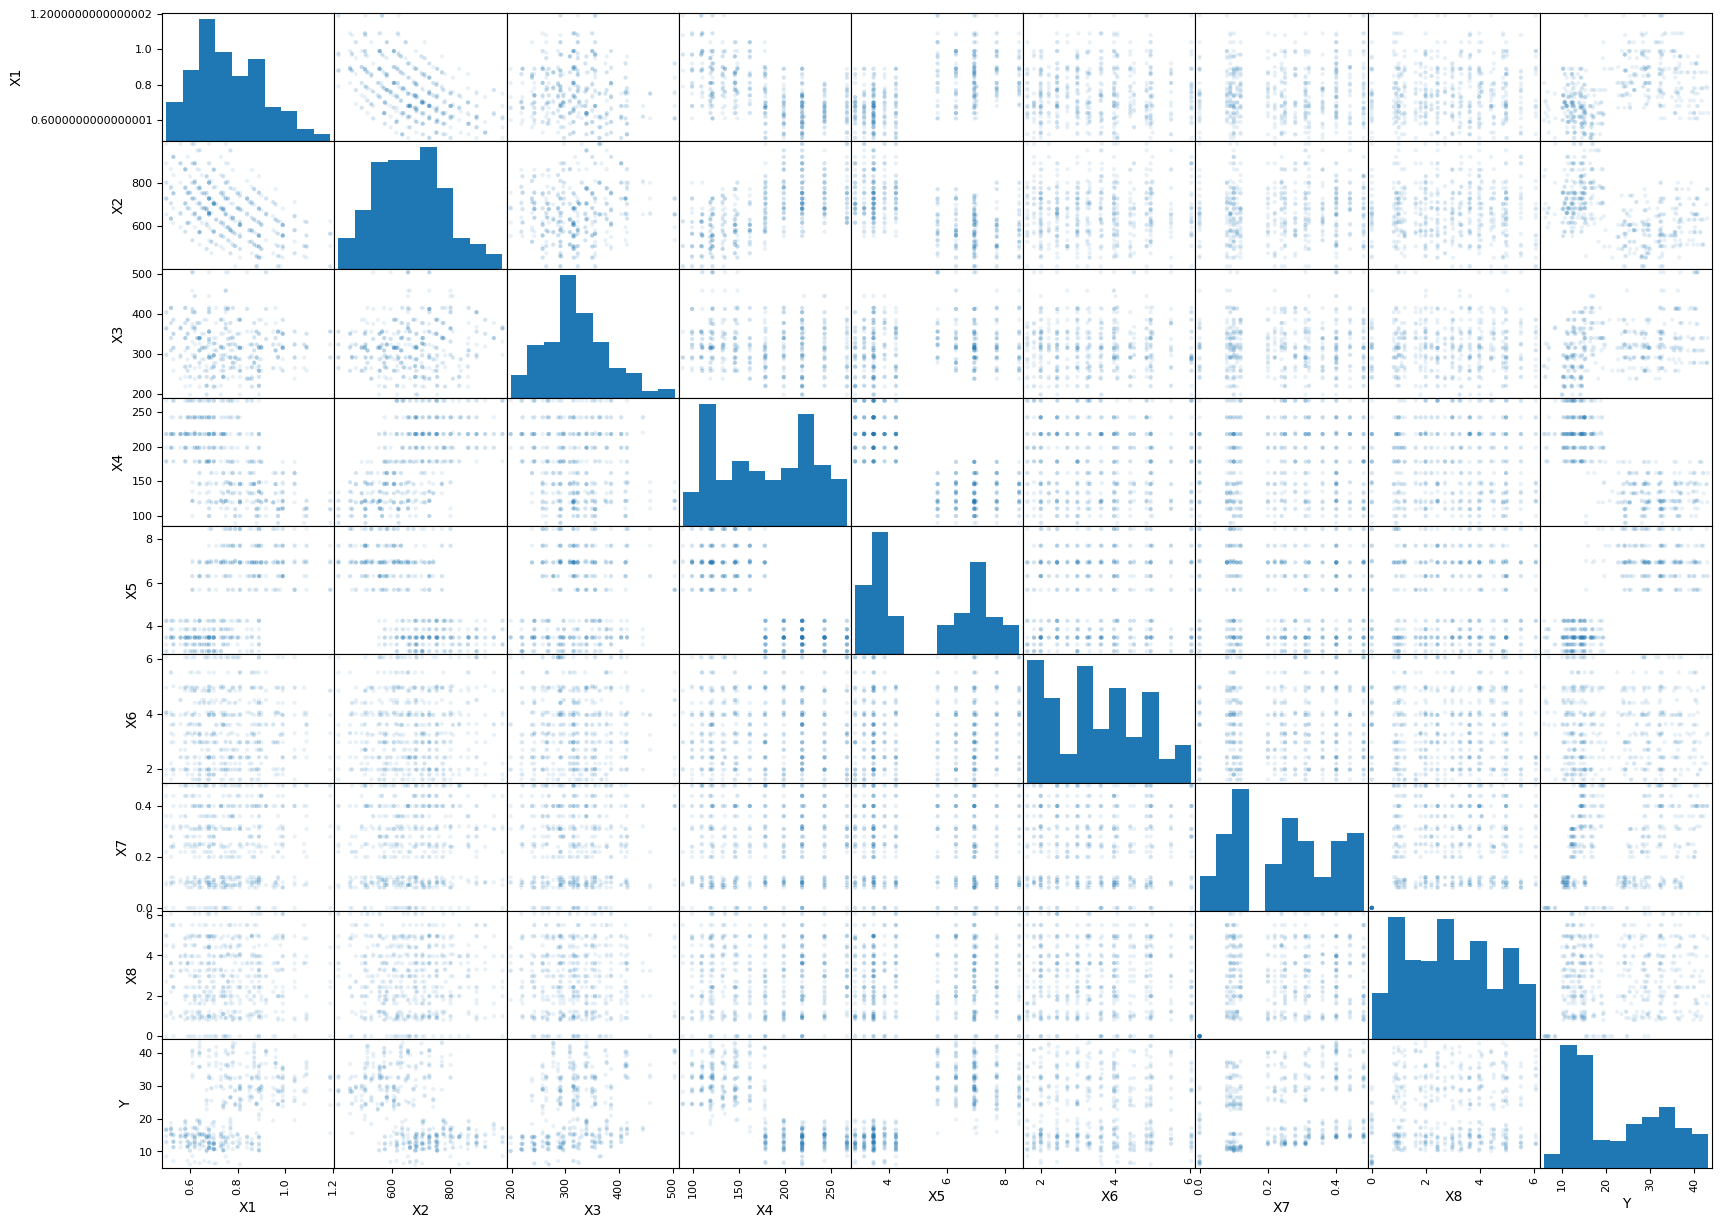

In [215]:
# Check the dimensions of the dataset
print("Dimensions of dataset:", df.shape)

# Look at the first few rows of the dataset
print(df.head())

# Check the data types of the columns
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

# Summarize the distribution of the features
print(df.describe())

# Visualize the distribution of the features
pd.plotting.scatter_matrix(df,alpha=0.1, figsize=(20,15))
plt.show()

<ipython-input-216-6f9d01365a91>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

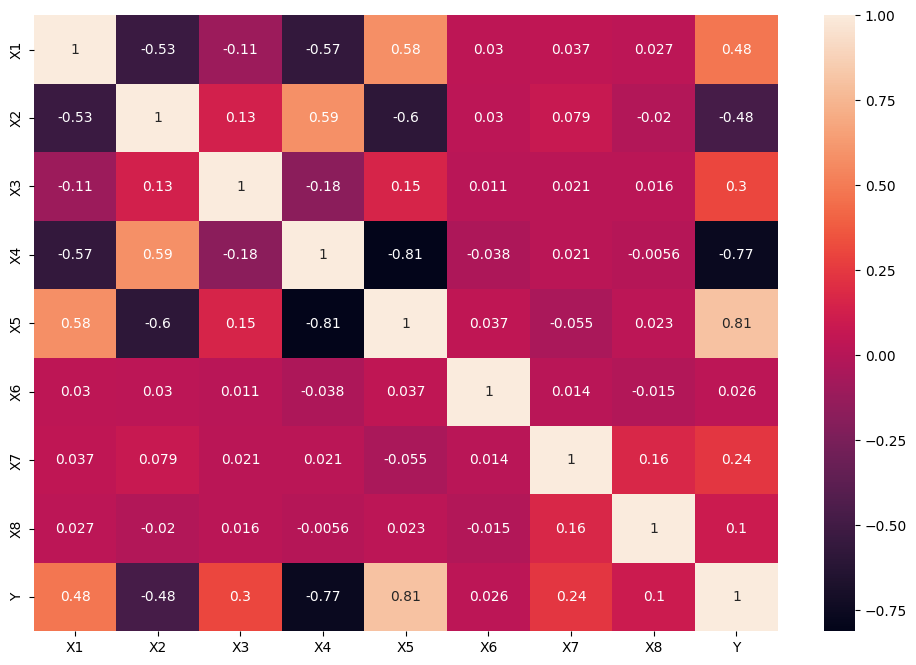

In [216]:
#HeatMap of the corrleation of the 9 features and the output variable.
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [217]:
# Printing out the information on data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 750 to 435
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      537 non-null    object 
 1   X1      537 non-null    float64
 2   X2      537 non-null    float64
 3   X3      503 non-null    float64
 4   X4      537 non-null    float64
 5   X5      537 non-null    float64
 6   X6      537 non-null    float64
 7   X7      537 non-null    float64
 8   X8      537 non-null    float64
 9   Y       537 non-null    float64
dtypes: float64(9), object(1)
memory usage: 46.1+ KB


In [218]:
#Here is the describtion of the table and everything about the table can be seen on the first column.
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y
count,537.000000,537.000000,503.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,0.762607,666.283780,320.084692,176.360819,5.241285,3.506797,0.242719,2.878845,22.360372
std,0.147744,120.358068,59.150184,51.062432,1.860047,1.234093,0.142596,1.617921,10.069606
min,0.500000,416.740000,198.450000,89.310000,2.840000,1.620000,0.000000,0.000000,6.040000
25%,0.650000,575.510000,277.830000,132.300000,3.470000,2.420000,0.100000,1.620000,13.050000
50%,0.740000,661.500000,315.320000,178.600000,4.240000,3.300000,0.250000,2.970000,19.060000
75%,0.870000,751.900000,355.740000,218.300000,6.930000,4.400000,0.360000,4.050000,32.000000
max,1.190000,978.290000,503.970000,266.800000,8.470000,6.050000,0.480000,6.050000,43.100000


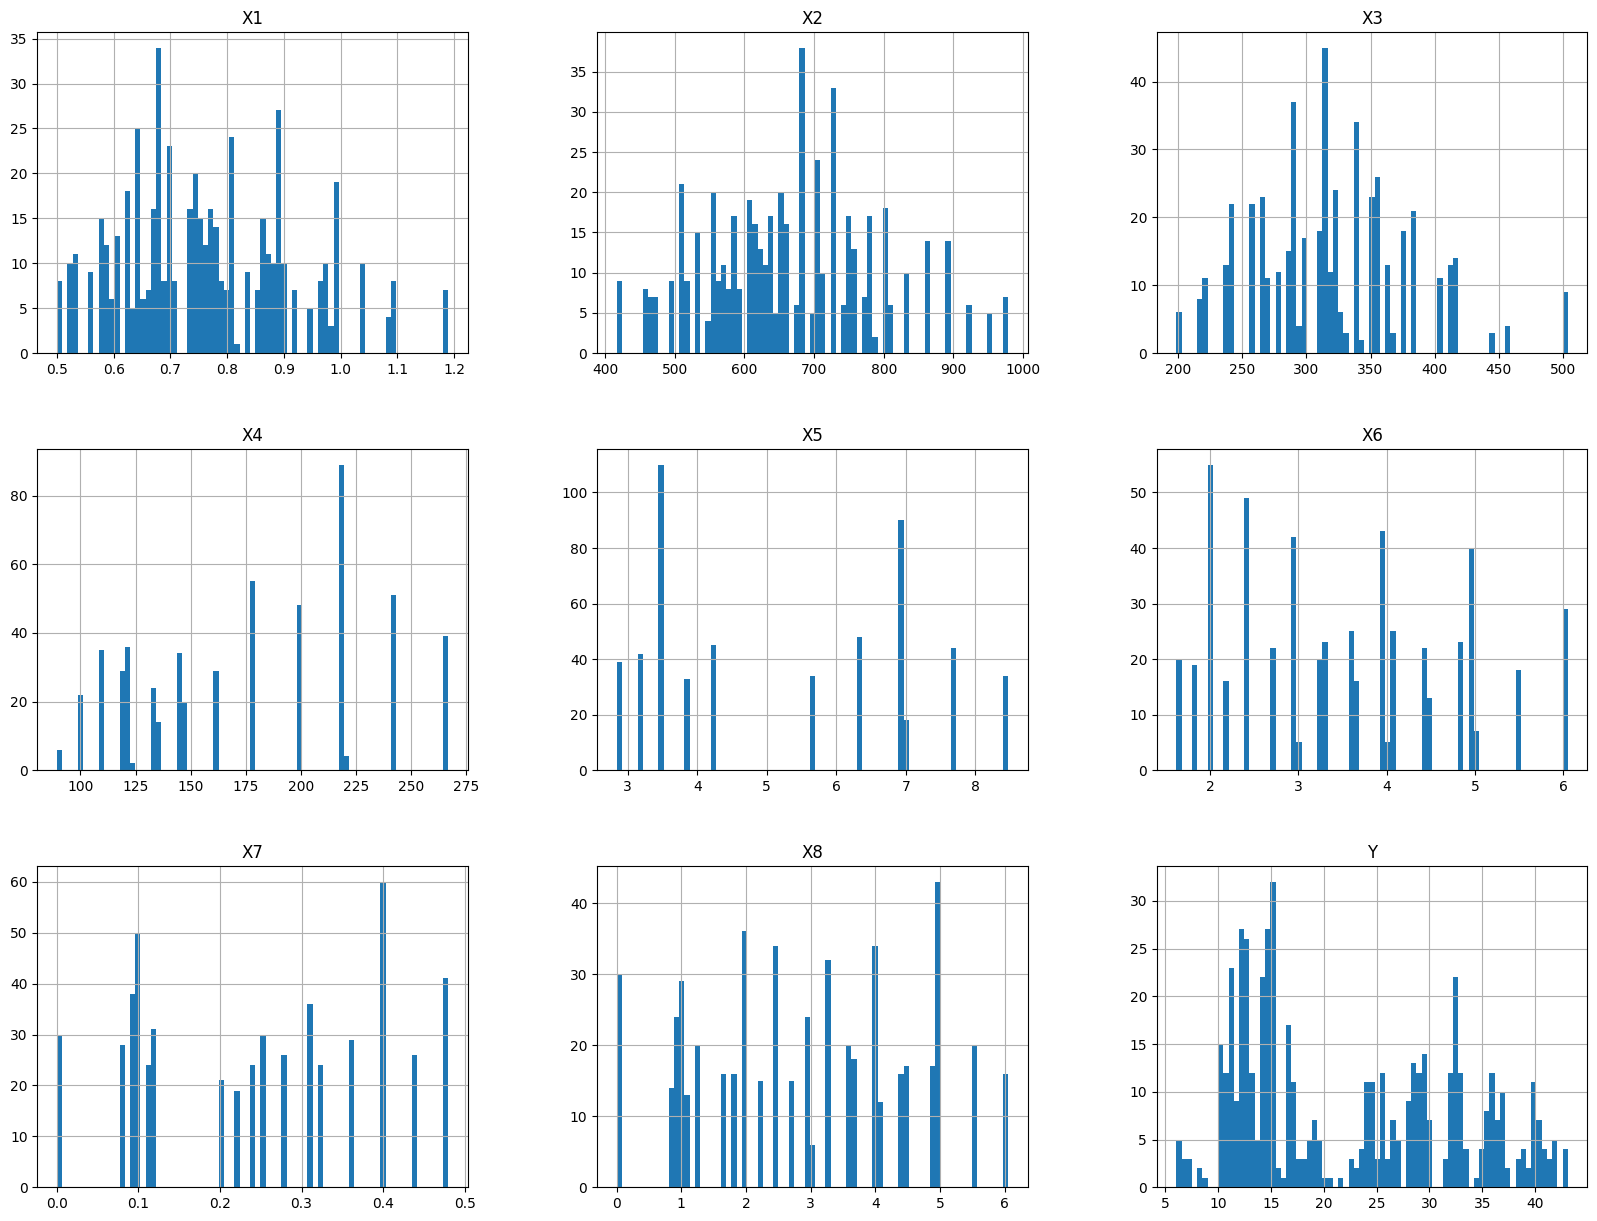

In [219]:
#Here I am creating a histogram to see how the data looks like of the features
#and quantitity of the variables that are recorded in the data set.
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=75, figsize=(20,15))
plt.show()

<Axes: xlabel='X4', ylabel='X5'>

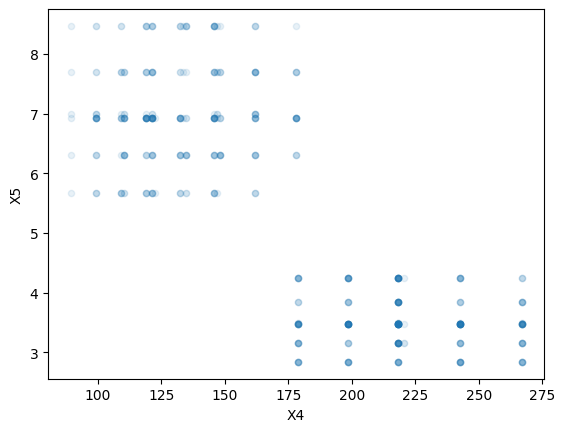

In [220]:
#Looking at a specific scatter plot of one of the features against Y
#and observing the data
df.plot(kind="scatter", x="X4", y="X5", alpha=0.1)

<Axes: xlabel='X4', ylabel='Y'>

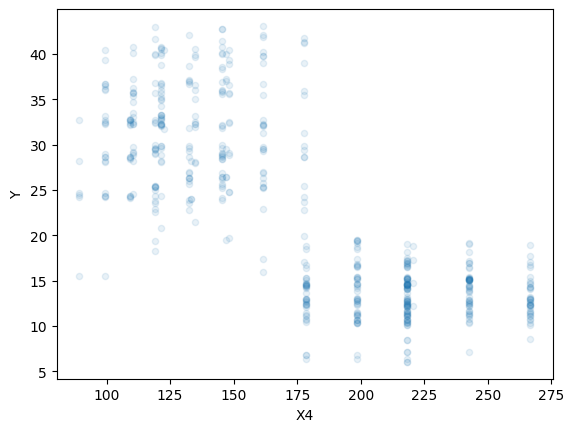

In [221]:
#Looking at a specific scatter plot of one of the features against Y
#and observing the data
df.plot(kind="scatter", x="X4", y="Y", alpha=0.1)

In [222]:
#The table here shows the correlation of the features and the output variable against each other.
df.corr()

<ipython-input-222-3e66ca910dd3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,X1,X2,X3,X4,X5,X6,X7,X8,Y
X1,1.000000,-0.533541,-0.105061,-0.572208,0.577932,0.030314,0.036980,0.027361,0.476628
X2,-0.533541,1.000000,0.131623,0.588955,-0.599740,0.029538,0.079102,-0.019596,-0.477305
X3,-0.105061,0.131623,1.000000,-0.177363,0.150862,0.011486,0.020977,0.016400,0.302395
X4,-0.572208,0.588955,-0.177363,1.000000,-0.813088,-0.038422,0.021315,-0.005602,-0.768098
X5,0.577932,-0.599740,0.150862,-0.813088,1.000000,0.037222,-0.055169,0.022865,0.805855
X6,0.030314,0.029538,0.011486,-0.038422,0.037222,1.000000,0.013758,-0.014940,0.025588
X7,0.036980,0.079102,0.020977,0.021315,-0.055169,0.013758,1.000000,0.164903,0.240615
X8,0.027361,-0.019596,0.016400,-0.005602,0.022865,-0.014940,0.164903,1.000000,0.099608
Y,0.476628,-0.477305,0.302395,-0.768098,0.805855,0.025588,0.240615,0.099608,1.000000


###Conclusion of the 9 features and the output variable.
Y has the highest corrlation with Overall Height. Also, Y has high corrlation with Roof Area despite
negative corrlation.
Furthermore, there is a high corrleation of Overall Height and the Roof Area.
These three corrlations are the highest in the table.
As a result, I will use them on the three different regression models.

### 4. Data pre-processing

Here I am going to clear the data and prepare it for the models to learn from it. This is an important part of the Machine Learning because it will influence how the model will be working. Also, I will split the data into training set and the testing set.

In [223]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [224]:
X_train_num = X_train.drop("X0", axis = 1)
X_train_num.head()

,X1,X2,X3,X4,X5,X6,X7,X8
750,0.70,703.40,326.10,218.30,3.47,4.84,0.48,5.50
267,0.89,754.60,220.50,198.45,4.24,4.95,0.10,4.95
318,0.70,575.51,296.45,198.45,3.47,3.24,0.20,1.10
758,0.66,751.91,385.39,266.80,3.15,4.84,0.48,5.50
639,0.81,741.13,257.98,145.53,6.93,6.05,0.40,2.43


In [225]:
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

# X_train_num = numeric_pipeline.fit_transform(X_train_num)
X_train_num_tr = numeric_pipeline.fit_transform(X_train_num)

In [226]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_train_num)
cat_attribs = ['X0']

full_pipeline = ColumnTransformer([
        ("num", numeric_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
 ])

X_train_prepared = full_pipeline.fit_transform(X_train)

In [227]:
X_train_prepared.shape

(537, 11)

In [228]:
X_train_prepared

array([[-0.42414911,  0.30866919,  0.11043317, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.86305891,  0.73446315, -1.73566051, ...,  1.        ,
         0.        ,  0.        ],
       [-0.42414911, -0.75490093, -0.40790658, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.08541016, -0.09475396,  1.69080124, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.06630229, -0.09475396,  0.96267812, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.40504124, -1.30502341,  0.6285981 , ...,  0.        ,
         1.        ,  0.        ]])

In [229]:
# # Drop the X0 column as it is a categorical variable that is not relevant for modelling
# X_train = X_train.drop("Catergory of the building", axis=1)

In [230]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer

# num_pipeline = Pipeline([
#         ('imputer', SimpleImputer(strategy="median")),
#         ('std_scaler', StandardScaler()),
#     ])

In [231]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# num_attribs = list(X_train)
# cat_attribs = ["Catergory of the building"]

# full_pipeline = ColumnTransformer([
#         ("num", num_pipeline, num_attribs)
#     ])

# X_train_pipline2 = full_pipeline.fit_transform(X_train)

In [232]:
#Looking at the shape of the data after the pipeline has been applied
# X_train

In [233]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# num_attribs = list(X_train)
# cat_attribs = ["Catergory of the building"]

# full_pipeline = ColumnTransformer([
#         ("num", num_pipeline, num_attribs)
#     ])

# X_test_pipline2 = full_pipeline.fit_transform(X_test)

# Performing the GridSearchCV on the training set

## Here is the GridSearchCV (tuning) of the Ridge Regression model with all the 9 features of the data set.

In [234]:
#Here is the list of all possible parameters that I can have for the Ridge Regression
#Model and test it and then tune it on the Ridge Regression Model.
param_grid = [
    {"alpha": [0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.5, 3.0, 3.5, 4.0],
     "max_iter": [1,5,10,15,20,25,30,40,50,75,100,125,150,200,300,400, 1000]}
]

In [235]:
#Grid Search Cross Validation the ridge regression model
# Use cross-validation to evaluate the performance of the model and select the best hyperparameters
grid_search_ridge = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train_prepared, Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                    0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,
                                    1.7, 1.8, 1.9, 2.0, 2.5, 3.0, 3.5, 4.0],
                          'max_iter': [1, 5, 10, 15, 20, 25, 30, 40, 50, 75,
                                       100, 125, 150, 200, 300, 400, 1000]}],
             scoring='neg_mean_squared_error')

In [236]:
print("Best hyperparameters: ", grid_search_ridge.best_params_)

Best hyperparameters:  {'alpha': 4.0, 'max_iter': 1}


In [237]:
print("Parameters for the ridge model: ", grid_search_ridge.best_estimator_)

Parameters for the ridge model:  Ridge(alpha=4.0, max_iter=1)


## Here is the GridSearchCV (tuning) of the Lasso Regression model with all the 9 features from the data set.

In [238]:
#Here is the list of all possible parameters that I can have for the Lasso Regression
#Model and test it and then tune it on the Lasso Regression Model.
param_grid = [
    {"alpha": [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5],
     "max_iter": [1,5,10,15,20,25,30,40,50,75,100,125,150,200,300,400, 1000]}
]

In [239]:
#Grid Search Cross Validation the ridge regression model
# Use cross-validation to evaluate the performance of the model and select the best hyperparameters
grid_search_lasso = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train_prepared, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.778e+03, tolerance: 4.243e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.678e+03, tolerance: 4.189e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.372e+03, tolerance: 4.368e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05,
                                    0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4,
                                    0.5],
                          'max_iter': [1, 5, 10, 15, 20, 25, 30, 40, 50, 75,
                                       100, 125, 150, 200, 300, 400, 1000]}],
             scoring='neg_mean_squared_error')

In [240]:
print("Best hyperparameters: ", grid_search_lasso.best_params_)

Best hyperparameters:  {'alpha': 0.1, 'max_iter': 15}


In [241]:
print("Parameters for the Lasso model: ", grid_search_lasso.best_estimator_)

Parameters for the Lasso model:  Lasso(alpha=0.1, max_iter=15)


## Here is the GridSearchCV (tuning) of the Neural Network model with all the 9 features from the data set.

The last model I choose is the neural network, which is a powerful machine learning model to deal with complex data. In this notebook, I use the Keras API of TensorFlow to create the model. The Sequential function is used to create a neural network with six layers. Each hidden layer has a different number of neurons, and the activation function used is the ReLU. The model is then compiled using the MSE loss function and the Adam optimizer.

In [242]:
import tensorflow as tf

In [243]:
# Define a Sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train_prepared.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu',),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model with mean squared error loss and Adam optimizer
model.compile(loss='mse', optimizer='adam')

In [244]:
history = model.fit(X_train_prepared, Y_train, epochs=100, batch_size=256)

Epoch 1/100
3/3 [==============================] - 1s 7ms/step - loss: 590.6255
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 543.2709
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 454.5815
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 305.9404
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 135.3693
Epoch 6/100
3/3 [==============================] - 0s 8ms/step - loss: 102.8903
Epoch 7/100
3/3 [==============================] - 0s 9ms/step - loss: 117.2166
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 56.3911
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 55.9337
Epoch 10/100
3/3 [==============================] - 0s 8ms/step - loss: 66.7062
Epoch 11/100
3/3 [==============================] - 0s 7ms/step - loss: 55.9288
Epoch 12/100
3/3 [==============================] - 0s 6ms/step - loss: 44.6750
Epoch 13/100
3/3 [========================

In [245]:
# Calculate MSE of the neural network model on the test set
mse = model.evaluate(X_train_prepared, Y_train)

print("MSE: ", mse)

17/17 [==============================] - 0s 2ms/step - loss: 8.0937
MSE:  8.09372615814209


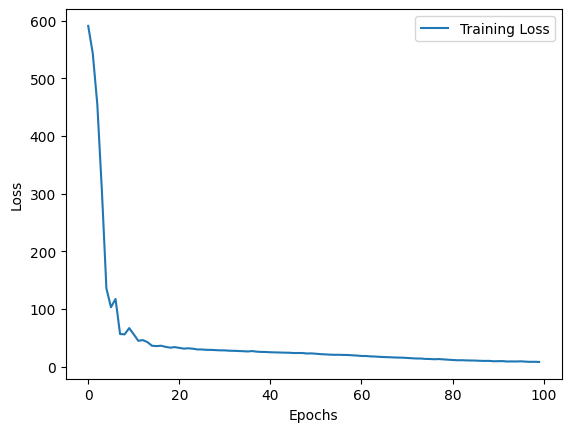

In [246]:
# Plotting the training loss over epochs
e = [i for i in range(100)]

plt.plot(e, history.history["loss"], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

For the neuural network model, the process is a little bit different because the I used tensorflow.keras to build the model therefore I can't use the grid search of sckit-learn directly. Based on this document (https://www.adriangb.com/scikeras/stable/migration.html), I used scikeras wrapper which allows me to use the keras model as an estimator in the sckit-learn pipline.

In [247]:
!pip install scikeras

In [248]:
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.optimizers import Adam

In [249]:
# Define the function for later use
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train_prepared.shape[1],)),
        tf.keras.layers.Dense(256, activation='relu',),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(loss='mse', optimizer='adam')

    return model

The KerasRegressor class from scikeras is used to wrap the Keras model into a scikit-learn estimator. This allows me to use the neural network model in the scikit-learn pipeline and perform grid search on its hyperparameters. The nn_params dictionary is defined to specify the hyperparameters to be tested during the grid search. It includes the batch size and learning rate for the Adam optimizer.

In [250]:
# Creating KerasRegressor using the create_model function defined above
keras_regressor = KerasRegressor(model=create_model)

# Defining the hyperparameters for the grid search
learn_rate = [0.001, 0.01, 0.1]
batch_size = [32, 64, 128, 256]
nn_params = dict(batch_size=batch_size, optimizer__learning_rate=learn_rate)

# Performing a grid search over the hyperparameters using KerasRegressor and GridSearchCV
nn_grid_search = GridSearchCV(estimator=keras_regressor, param_grid=nn_params, cv=5, scoring='neg_mean_squared_error')

In [251]:
nn_grid_search.fit(X_train_prepared, Y_train)

17/17 [==============================] - 1s 4ms/step - loss: 488.8657


GridSearchCV(cv=5,
             estimator=KerasRegressor(model=<function create_model at 0x7d983c5da680>),
             param_grid={'batch_size': [32, 64, 128, 256],
                         'optimizer__learning_rate': [0.001, 0.01, 0.1]},
             scoring='neg_mean_squared_error')

In [252]:
# Print optimal params and MSE with the optimal params
print("Optimal params: ", nn_grid_search.best_params_)
print("MSE: ", -nn_grid_search.best_score_)

Optimal params:  {'batch_size': 32, 'optimizer__learning_rate': 0.01}
MSE:  191.26450925234343


# Evaluate the different models with new parameter.


## New ridge regression models with cross validation.

Ridge Regression model of all the features in the data set

In [253]:
#Model development
#Ridge Regression with parameters from the cross validation operation and with all features all together.
new_ridge_reg_cross_validation = Ridge(alpha=4.0, max_iter=1, random_state=1)
new_ridge_reg_cross_validation.fit(X_train_prepared, Y_train)

Ridge(alpha=4.0, max_iter=1, random_state=1)

In [254]:
#Cross-validation of linear regression model with Overall Height and Roof Area
cross_val_score_new_ridge_reg_cross_validation = cross_val_score(new_ridge_reg_cross_validation,X_train_prepared, Y_train, scoring='neg_mean_squared_error', cv=5)
mse_score = cross_val_score_new_ridge_reg_cross_validation.mean()

print("cross_val_score_new_ridge_reg_cross_validation: ", cross_val_score_new_ridge_reg_cross_validation)
print("mse_score: ", -mse_score)

cross_val_score_new_ridge_reg_cross_validation:  [-19.52936119 -25.69889703 -21.66512027 -21.09539796 -24.13618941]
mse_score:  22.424993169672433


## New lasso regression models with cross validation.

Lasso regression model of all 9 features in the data set

In [255]:
#Perform feature selection score using Lasso regression
new_lasso_reg_cross_validation = Lasso(alpha=0.005, max_iter=30, random_state=1)
new_lasso_reg_cross_validation.fit(X_train_prepared, Y_train)

Lasso(alpha=0.005, max_iter=30, random_state=1)

In [256]:
#Cross-validation of linear regression model with Overall Height and Roof Area
cross_val_score_new_lasso_reg_cross_validation = cross_val_score(new_lasso_reg_cross_validation,X_train_prepared, Y_train, scoring='neg_mean_squared_error', cv=5)
mse_score = cross_val_score_new_lasso_reg_cross_validation.mean()

print("cross_val_score_new_lasso_reg_cross_validation: ", cross_val_score_new_lasso_reg_cross_validation)
print("mse_score: ", -mse_score)

cross_val_score_new_lasso_reg_cross_validation:  [-19.38712105 -25.72697793 -21.75339716 -20.99417082 -24.33405601]
mse_score:  22.439144595705486


In [257]:
# Optimal params:  {'batch_size': 32, 'optimizer__learning_rate': 0.001}
model_optimal = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train_prepared.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu',),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model_optimal.compile(loss='mse', optimizer=optimizer)

new_history = model_optimal.fit(X_train_prepared, Y_train, epochs=100, batch_size=32)

Epoch 1/100
17/17 [==============================] - 1s 4ms/step - loss: 437.5050
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 76.1375
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 44.2359
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 35.9746
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 30.6116
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 28.8506
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 30.5792
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 27.7466
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 26.1562
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 24.5214
Epoch 11/100
17/17 [==============================] - 0s 5ms/step - loss: 23.1317
Epoch 12/100
17/17 [==============================] - 0s 4ms/step - loss: 22.0709
Epoch 13/100
17/17 [====

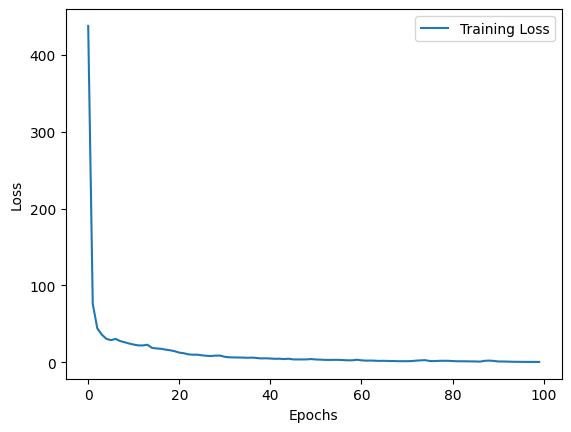

In [258]:
# Plotting the training loss over epochs
e = [i for i in range(100)]

plt.plot(e, new_history.history["loss"], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [259]:
from sklearn.model_selection import KFold
import numpy as np

# Define the K-fold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=1000)

mse_scores = []

for train_index, val_index in kfold.split(X_train_prepared):

    # Split the data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_train_prepared[train_index], X_train_prepared[val_index]
    y_train_fold, y_val_fold = Y_train.iloc[train_index], Y_train.iloc[val_index]

    # Define the model architecture
    model_optimal_new_data = tf.keras.Sequential([
      tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train_prepared.shape[1],)),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1),
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model_optimal_new_data.compile(loss='mse', optimizer=optimizer)

    # Train the model on the training set for this fold
    history = model_optimal_new_data.fit(X_train_fold, y_train_fold, epochs=200, batch_size=256, validation_data=(X_val_fold, y_val_fold), verbose=0)

    # Evaluate the model on the validation set for this fold
    mse = model_optimal_new_data.evaluate(X_val_fold, y_val_fold, verbose=0)
    mse_scores.append(mse)

# Compute the mean MSE across all folds
mean_mse = np.mean(mse_scores)
print("Mean MSE: ", mean_mse)

Mean MSE:  19.161566162109374


As we can see, the best models to chose is:


1. Neural Network: The Neural Network, gives us the lowest means square error out of the Machine Learning Models. This will give us the best performance. The project can be experimented more, for instance, create new variables and test how the models perform on the datasets.